In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# make plots look clean and readable
plt.style.use("seaborn-v0_8-whitegrid")

# display all columns
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv(r"C:\Users\nimit\OneDrive\Documents\CV stuff\PortfolioProjectFiles\Tesla_Global_Deliveries\tesla_deliveries_dataset_2015_2025.csv")
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [6]:
#Basic info of dataset

print("Shape:", df.shape)
print("\nData Types:zn", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (2640, 12)

Data Types:zn Year                      int64
Month                     int64
Region                   object
Model                    object
Estimated_Deliveries      int64
Production_Units          int64
Avg_Price_USD           float64
Battery_Capacity_kWh      int64
Range_km                  int64
CO2_Saved_tons          float64
Source_Type              object
Charging_Stations         int64
dtype: object

Missing Values:
 Year                    0
Month                   0
Region                  0
Model                   0
Estimated_Deliveries    0
Production_Units        0
Avg_Price_USD           0
Battery_Capacity_kWh    0
Range_km                0
CO2_Saved_tons          0
Source_Type             0
Charging_Stations       0
dtype: int64


In [8]:
df.describe()

,Year,Month,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Charging_Stations
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,2020.000000,6.500000,9922.199621,10655.847348,84907.340330,87.059470,500.257576,744.076989,8932.133712
std,3.162877,3.452707,3935.950093,4260.600858,20123.258036,20.836265,120.868549,353.221224,3469.565883
min,2015.000000,1.000000,48.000000,50.000000,50003.700000,60.000000,330.000000,3.070000,3002.000000
25%,2017.000000,3.750000,7292.000000,7828.250000,67726.365000,75.000000,418.000000,499.620000,5897.750000
50%,2020.000000,6.500000,9857.000000,10546.500000,85058.510000,82.000000,470.000000,699.515000,8901.500000
75%,2023.000000,9.250000,12510.250000,13469.000000,102373.042500,100.000000,586.250000,943.765000,11938.000000
max,2025.000000,12.000000,25704.000000,28939.000000,119965.360000,120.000000,719.000000,2548.550000,14996.000000


In [9]:
#Identifying Unique Models and Regions

print("\nModels:", df['Model'].unique())
print("\nRegions:", df['Region'].unique())


Models: ['Model S' 'Model X' 'Model 3' 'Model Y' 'Cybertruck']

Regions: ['Europe' 'Asia' 'North America' 'Middle East']


In [10]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Deliveries Over Time
#Here we visualize Tesla’s global deliveries by model from 2015–2025.
#This helps identify which models grew the fastest and how total deliveries changed over time

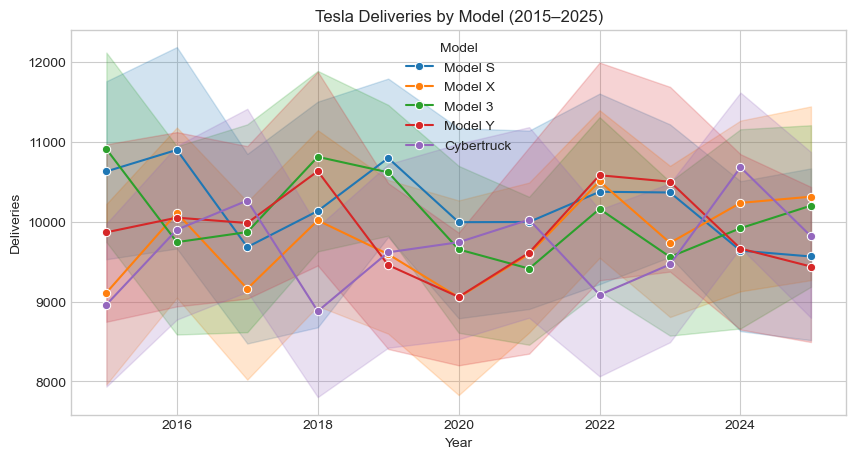

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year", y="Estimated_Deliveries", hue="Model", marker="o")
plt.title("Tesla Deliveries by Model (2015–2025)")
plt.ylabel("Deliveries")
plt.grid(True)
plt.show()

In [ ]:
#Regional Deliveries Comparison
#This chart compares total deliveries across regions.
#It reveals which continents or markets have the highest Tesla demand.

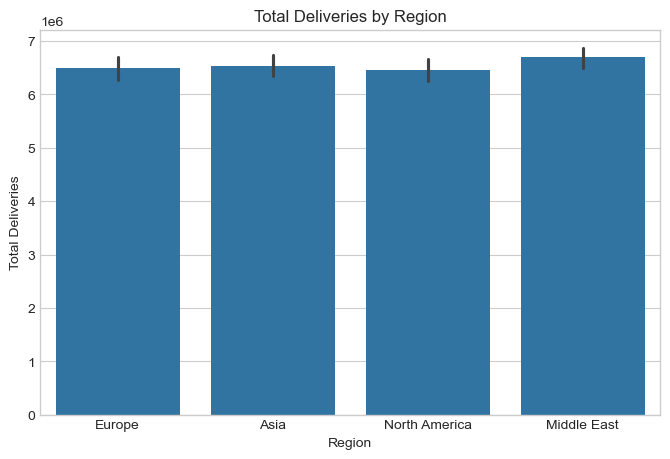

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Region", y="Estimated_Deliveries", estimator='sum')
plt.title("Total Deliveries by Region")
plt.ylabel("Total Deliveries")
plt.show()

In [ ]:
#Average Price Trend
#Tesla prices have changed over the years due to production scaling and new model introductions.
#This plot shows the average price trend per model, helping visualize affordability and market strategy.

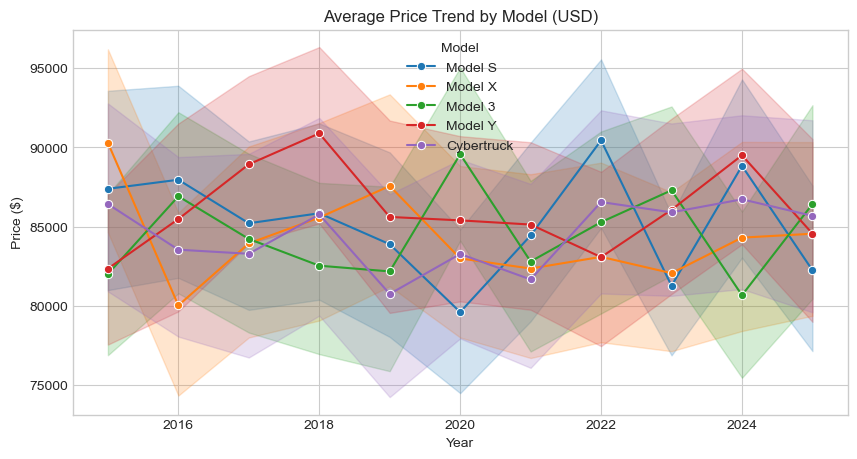

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year", y="Avg_Price_USD", hue="Model", marker="o")
plt.title("Average Price Trend by Model (USD)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

In [17]:
#Correlation Heatmap¶
#We create a correlation matrix to explore relationships among numeric features.
#This helps identify how factors like battery size, range, and production relate to deliveries.

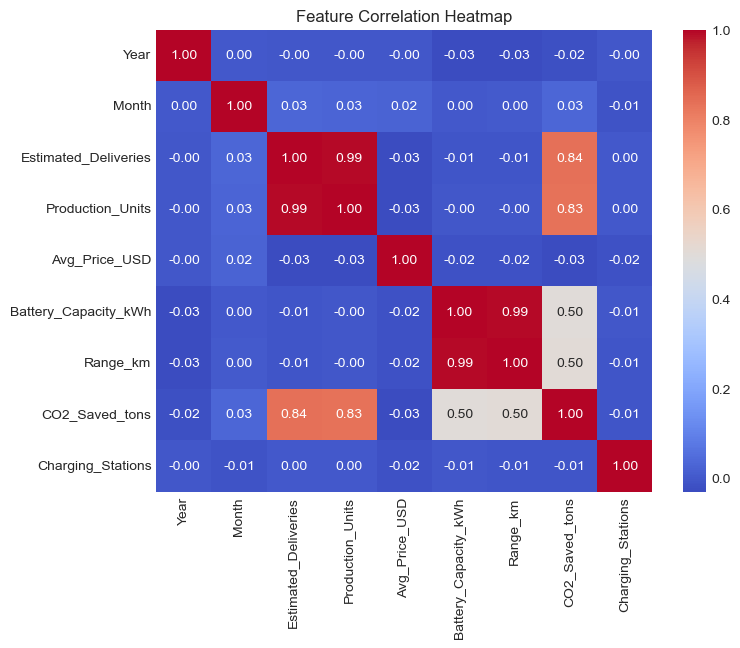

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
#Predictive Modeling (Linear Regression)¶
#In this section, we build a simple Linear Regression model to predict deliveries based on production and year.
#This gives us an idea of how production output drives Tesla’s delivery growth.

Mean Absolute Error 338.2106008875115
R^2 Score: 0.988431292535176


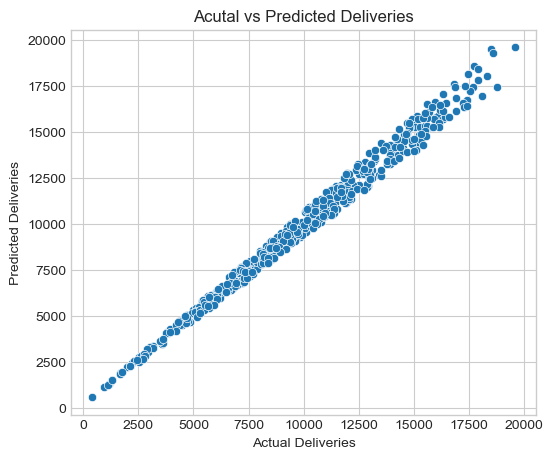

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[['Year', 'Production_Units']]
y = df['Estimated_Deliveries']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Deliveries")
plt.ylabel("Predicted Deliveries")
plt.title("Acutal vs Predicted Deliveries")
plt.show()

In [ ]:
# Insights and Observations
#Model Y and Model 3 dominate global deliveries, especially after 2020.
#Deliveries increase consistently each year, reflecting Tesla’s expansion.
#Range and battery capacity show a strong positive correlation.
#Average prices slightly decline over time, indicating cost efficiency and scaling.
#The linear regression model shows that production strongly predicts deliveries.